In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import scipy.stats as st

In [2]:
heart = pd.read_csv(r'C:\2 NIT\Resume project\EDA\heart.csv')

In [3]:
heart.shape

(303, 14)

In [4]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
heart['target'].unique()

array([1, 0], dtype=int64)

In [9]:
heart['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

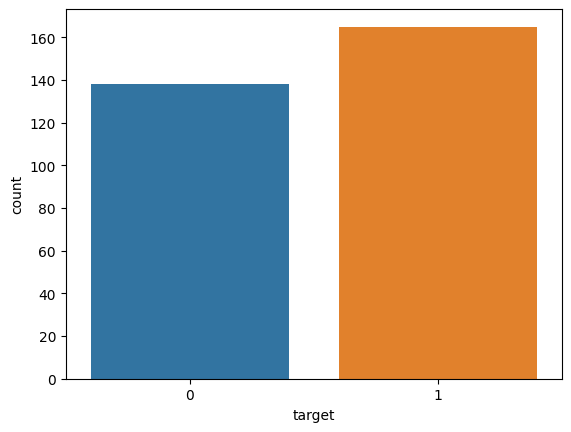

In [10]:
sns.countplot(x='target',data=heart)
plt.show()

In [11]:
heart.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

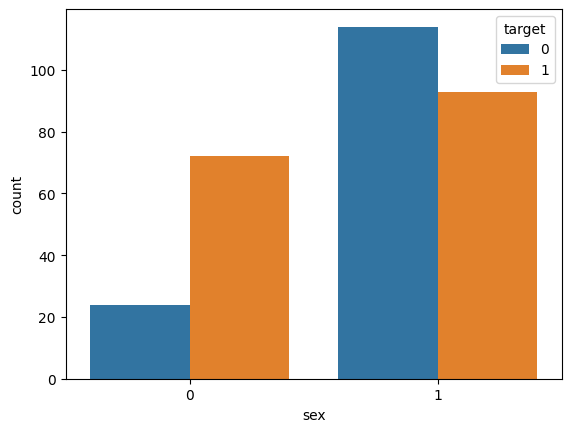

In [12]:
sns.countplot(x='sex',hue='target',data=heart)
plt.show()

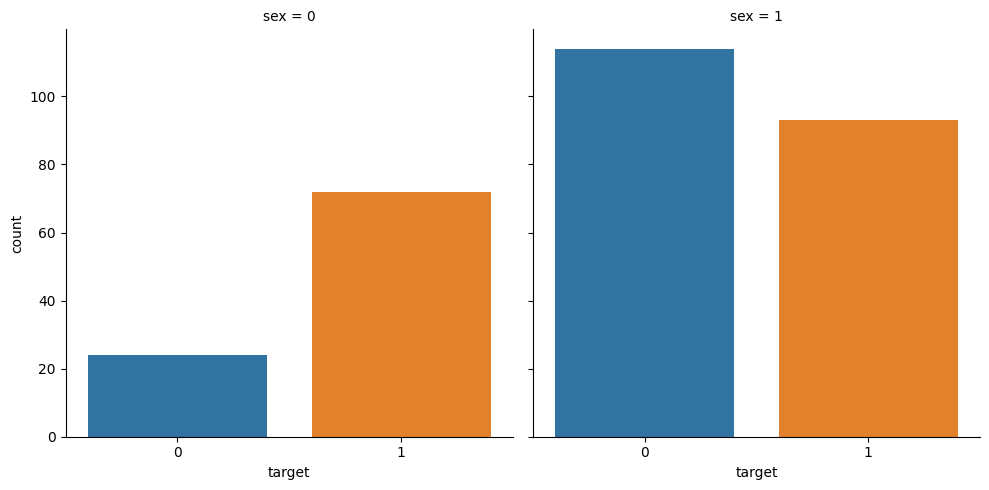

In [13]:
sns.catplot(x='target',col='sex',data=heart,kind='count',aspect=1)
plt.show()

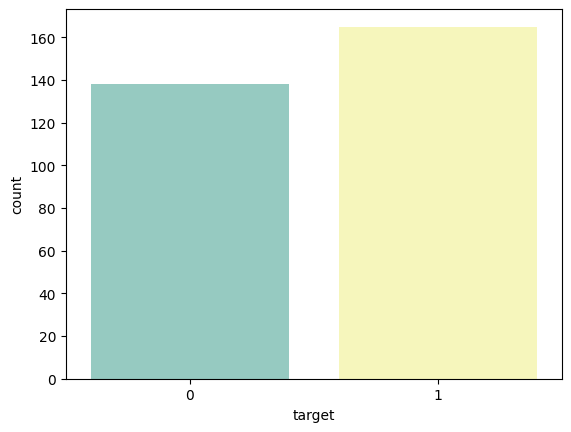

In [14]:
sns.countplot(x='target',data=heart,palette='Set3')
plt.show()

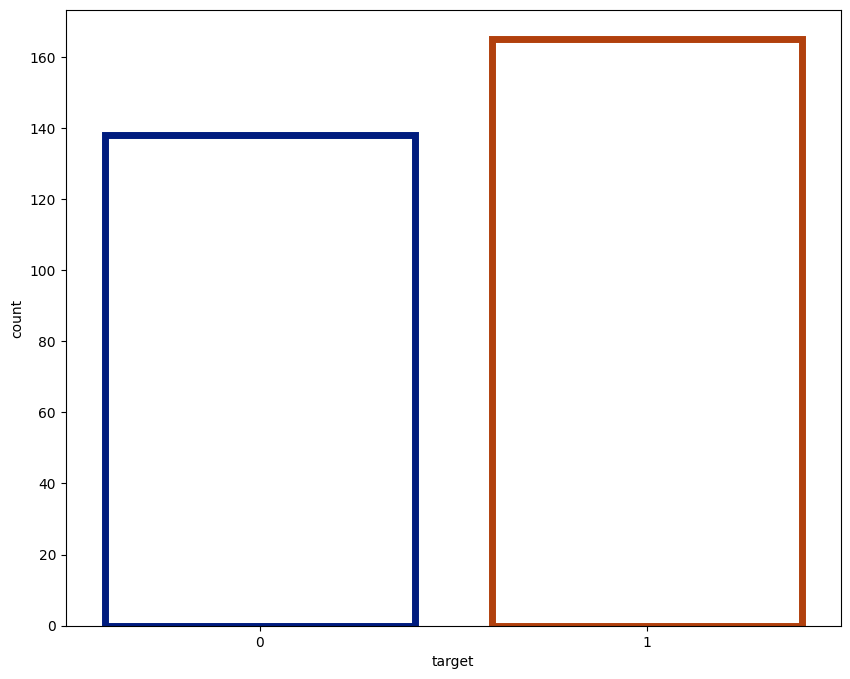

In [25]:
f,ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(x='target',data =heart,facecolor=(0,0,0,0),linewidth=5,edgecolor=sns.color_palette("dark",3))
plt.show()

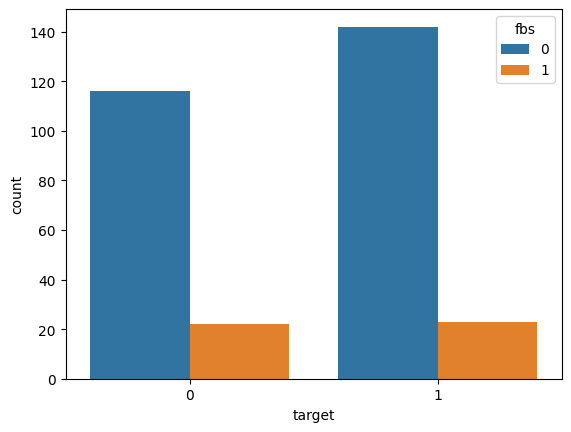

In [26]:
sns.countplot(x='target',hue='fbs',data=heart)
plt.show()

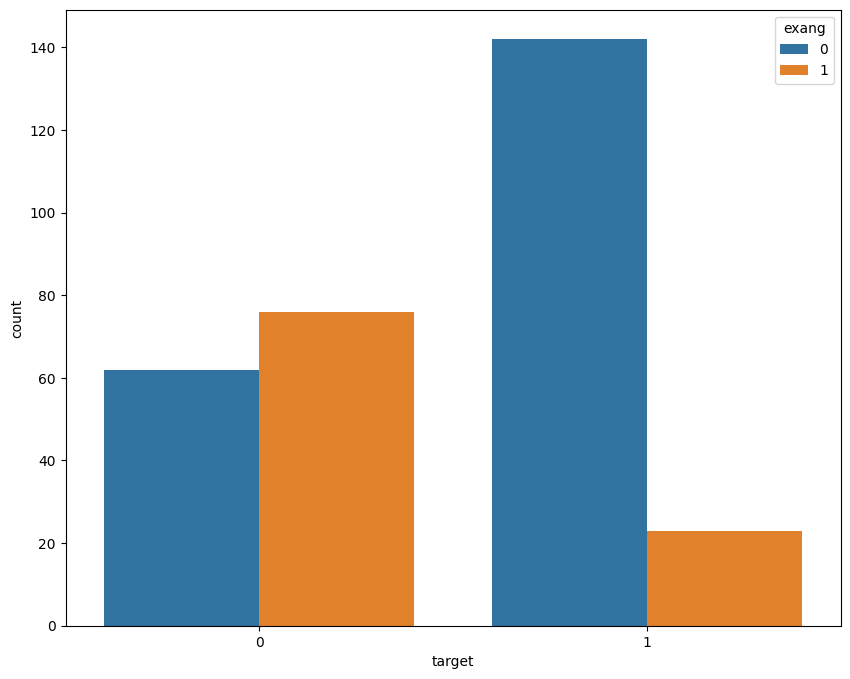

In [27]:
f,ax = plt.subplots(figsize=(10,8))
ax =sns.countplot(x="target",data=heart,hue='exang')

In [28]:
correlation = heart.corr()

In [30]:
correlation['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [31]:
heart['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

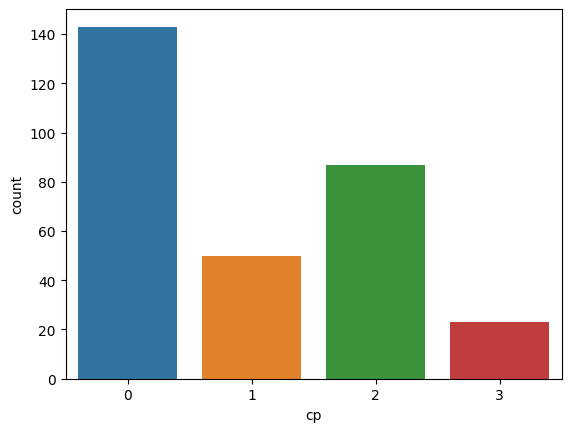

In [33]:
sns.countplot(x='cp',data=heart)

In [35]:
heart.groupby('cp')['target'].value_counts()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: target, dtype: int64

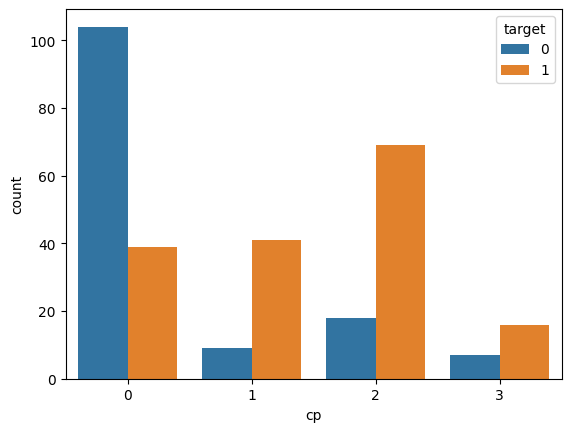

In [37]:
sns.countplot(x='cp',hue='target',data= heart)
plt.show()

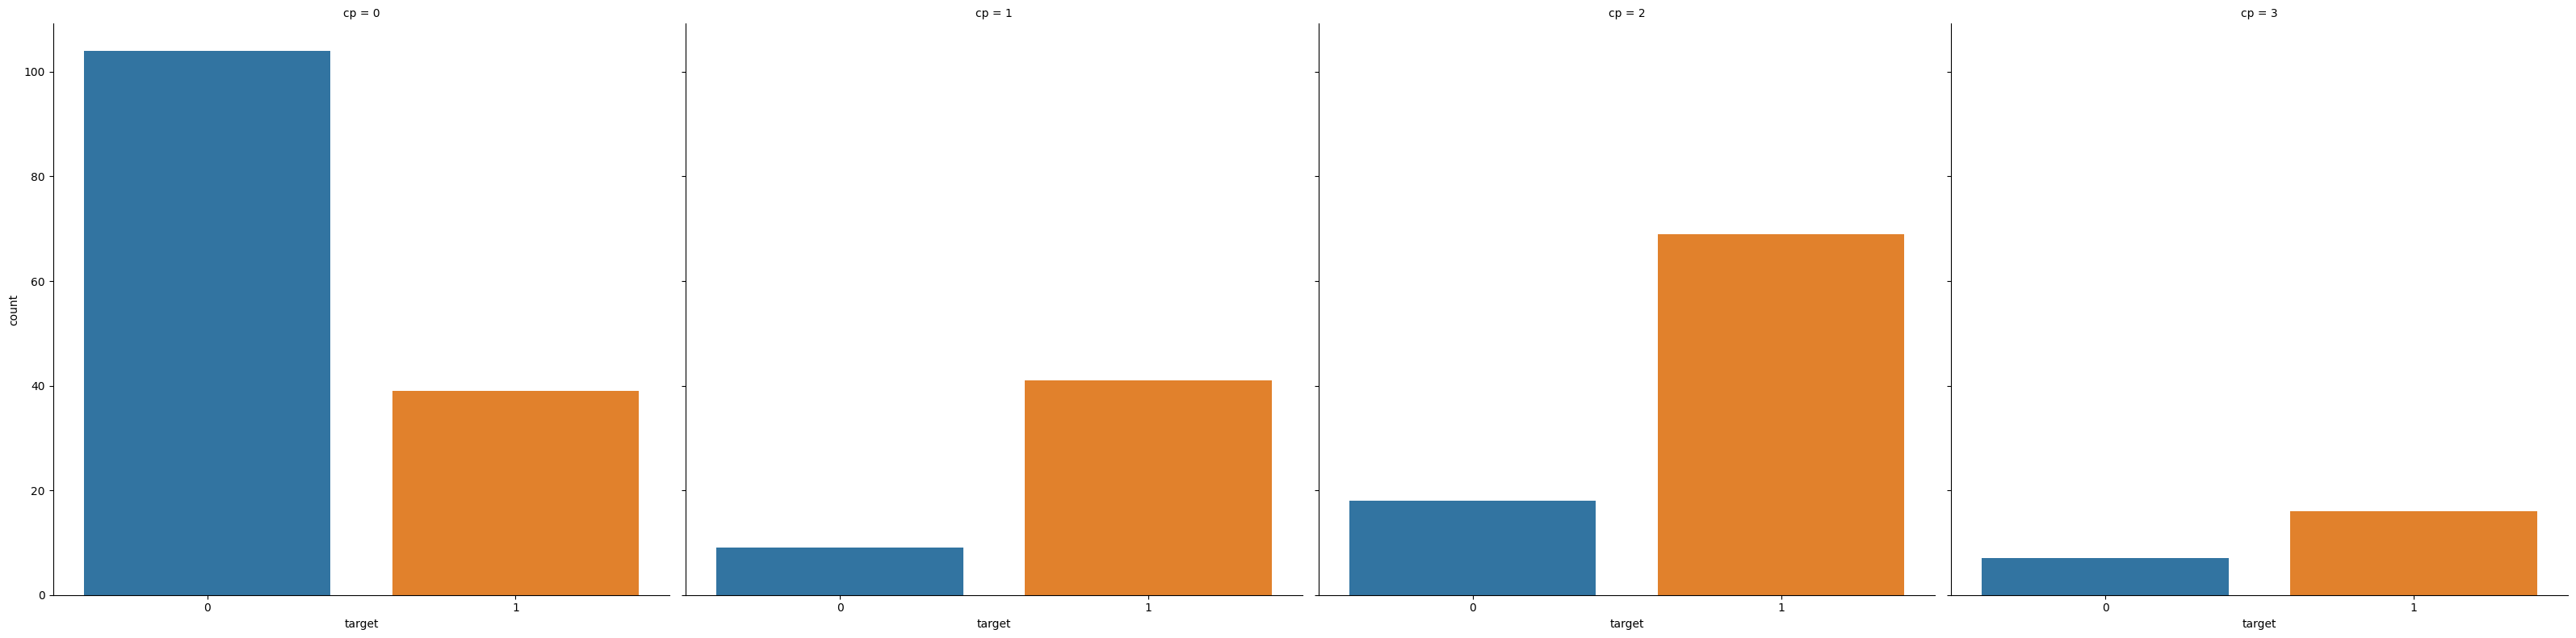

In [40]:
sns.catplot(x='target',col='cp',data=heart,height=8,kind='count',aspect=1)

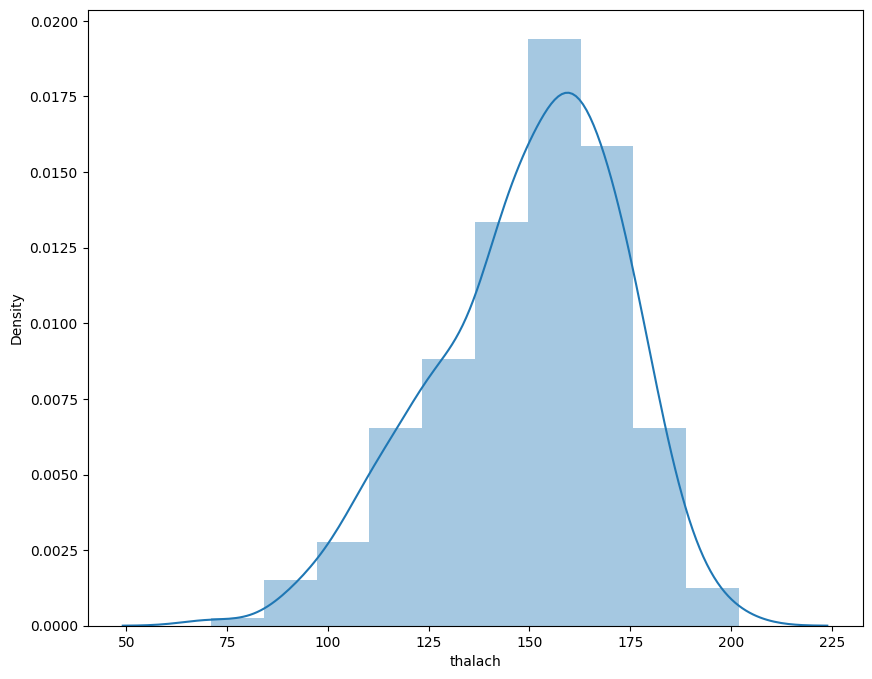

In [42]:
f,ax = plt.subplots(figsize=(10,8))
x=heart['thalach']
ax=sns.distplot(x,bins=10)
plt.show()

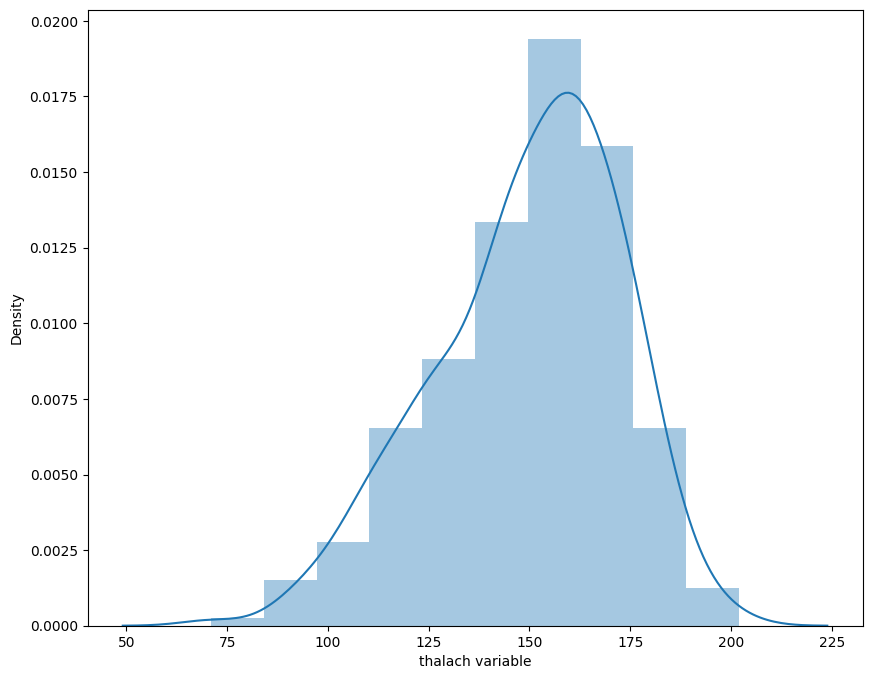

In [44]:
f,ax=plt.subplots(figsize=(10,8))
x=heart['thalach']
x=pd.Series(x,name='thalach variable')
ax=sns.distplot(x,bins=10)
plt.show()

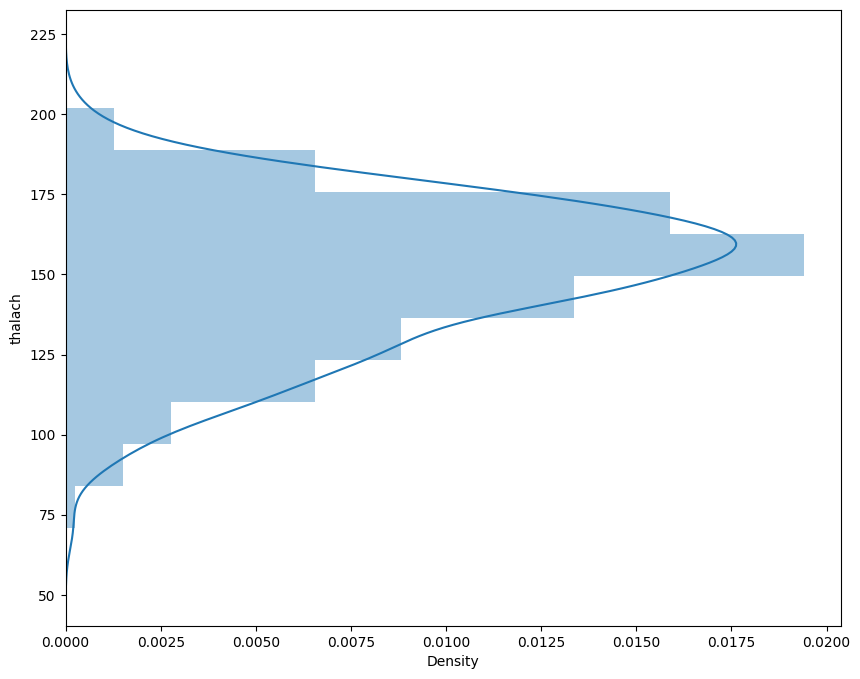

In [45]:
f,ax=plt.subplots(figsize=(10,8))
x=heart['thalach']
ax=sns.distplot(x,bins=10,vertical=True)
plt.show()

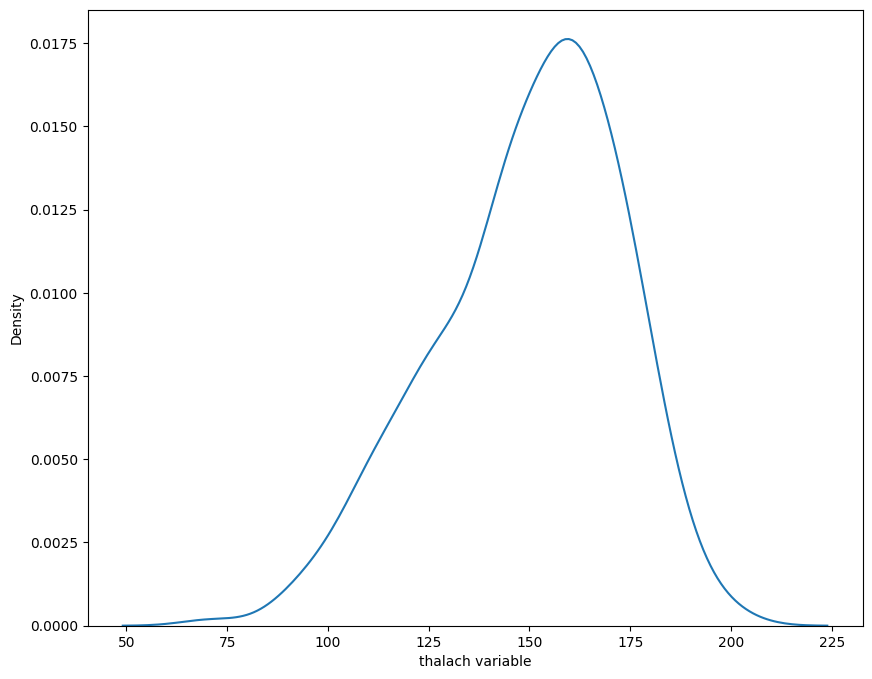

In [46]:
f,ax=plt.subplots(figsize=(10,8))
x=heart['thalach']
x=pd.Series(x,name="thalach variable")
ax = sns.kdeplot(x)
plt.show()

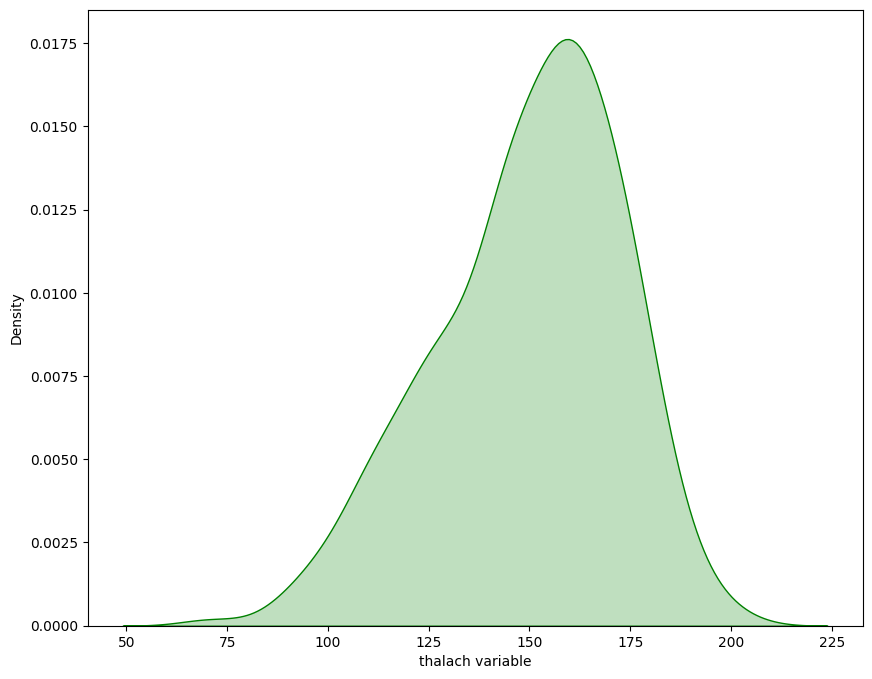

In [50]:
f,ax=plt.subplots(figsize=(10,8))
x=heart['thalach']
x=pd.Series(x,name="thalach variable")
ax = sns.kdeplot(x,shade=True,color='g')
plt.show()

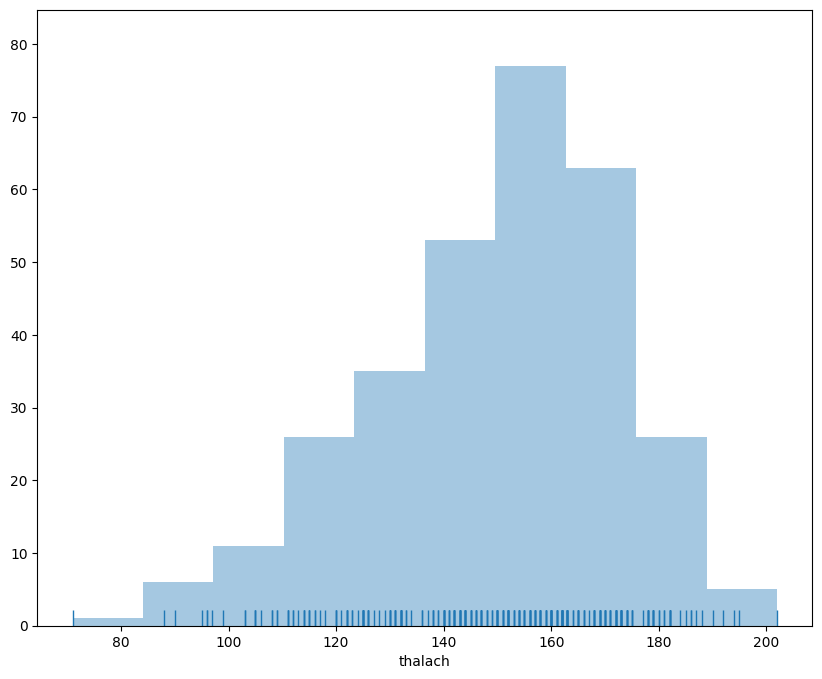

In [51]:
f,ax =plt.subplots(figsize=(10,8))
x=heart['thalach']
ax = sns.distplot(x,kde=False,rug=True,bins=10)
plt.show()

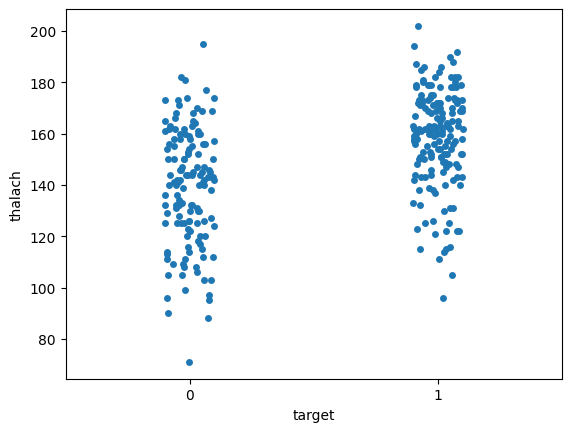

In [53]:
sns.stripplot(x='target',y='thalach',data=heart)
plt.show()

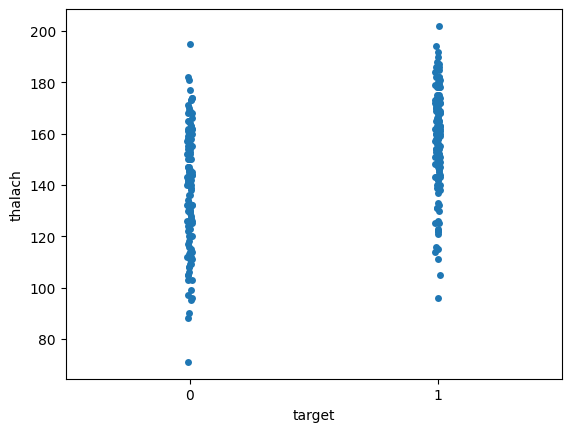

In [57]:
sns.stripplot(x='target',y='thalach',data=heart,jitter=0.01)
plt.show()

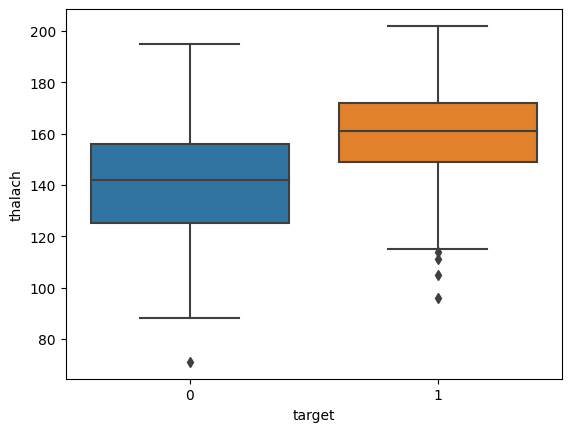

In [58]:
sns.boxplot(x='target',y='thalach',data=heart)
plt.show()

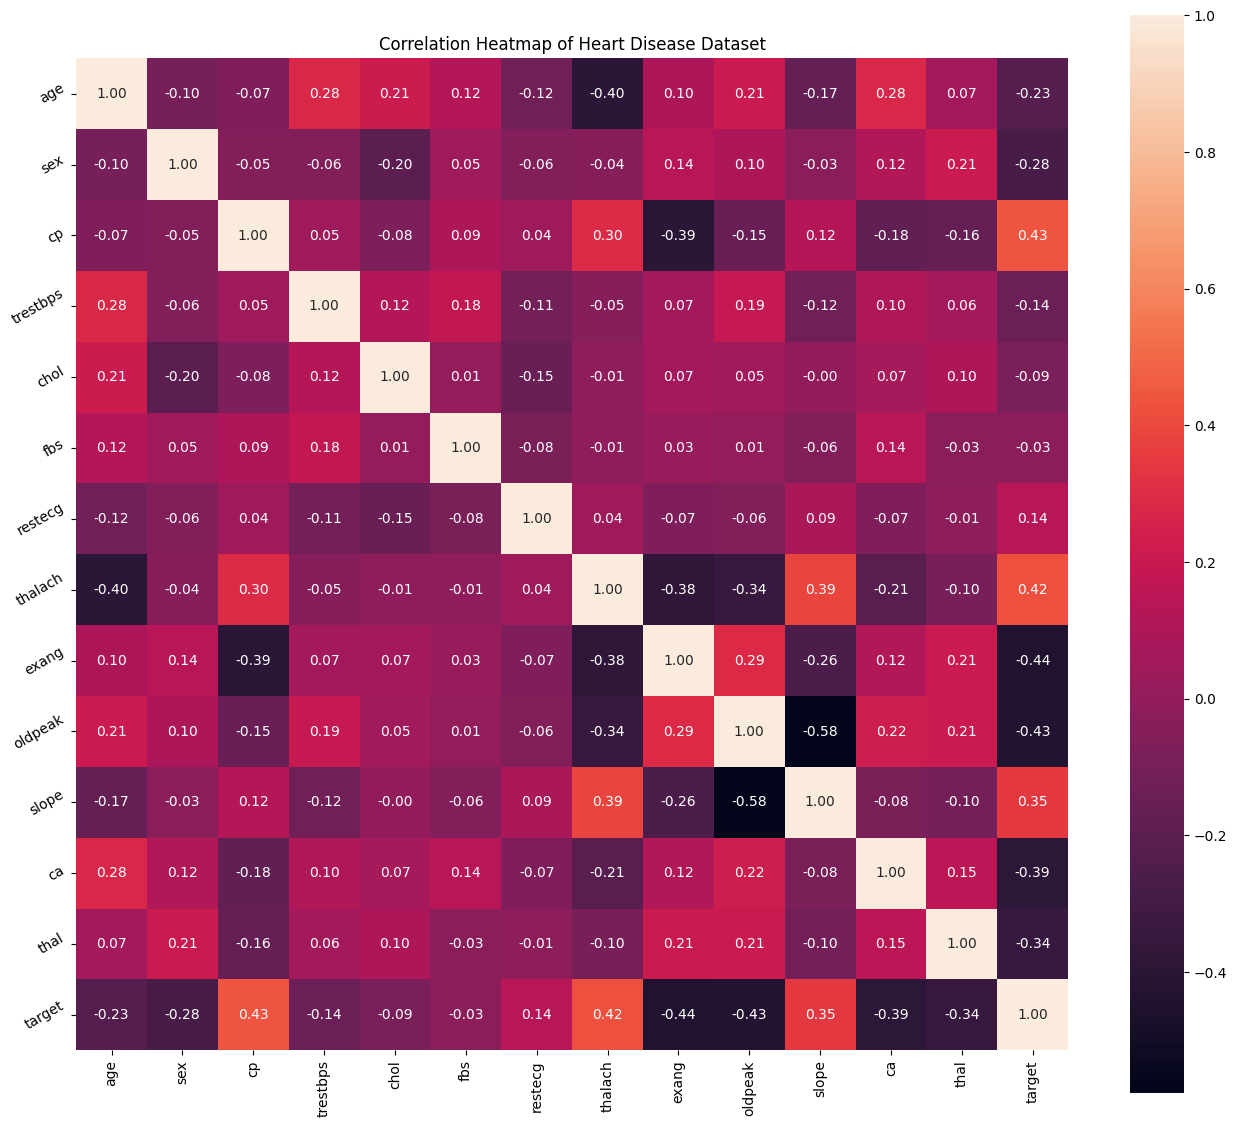

In [67]:
plt.figure(figsize=(16,14))
plt.title('Correlation Heatmap of Heart Disease Dataset')
a=sns.heatmap(correlation,square=True,annot=True,fmt='.2f',linecolor='white')
a.set_xticklabels(a.get_xticklabels(),rotation=90)
a.set_yticklabels(a.get_yticklabels(),rotation=30)
plt.show()

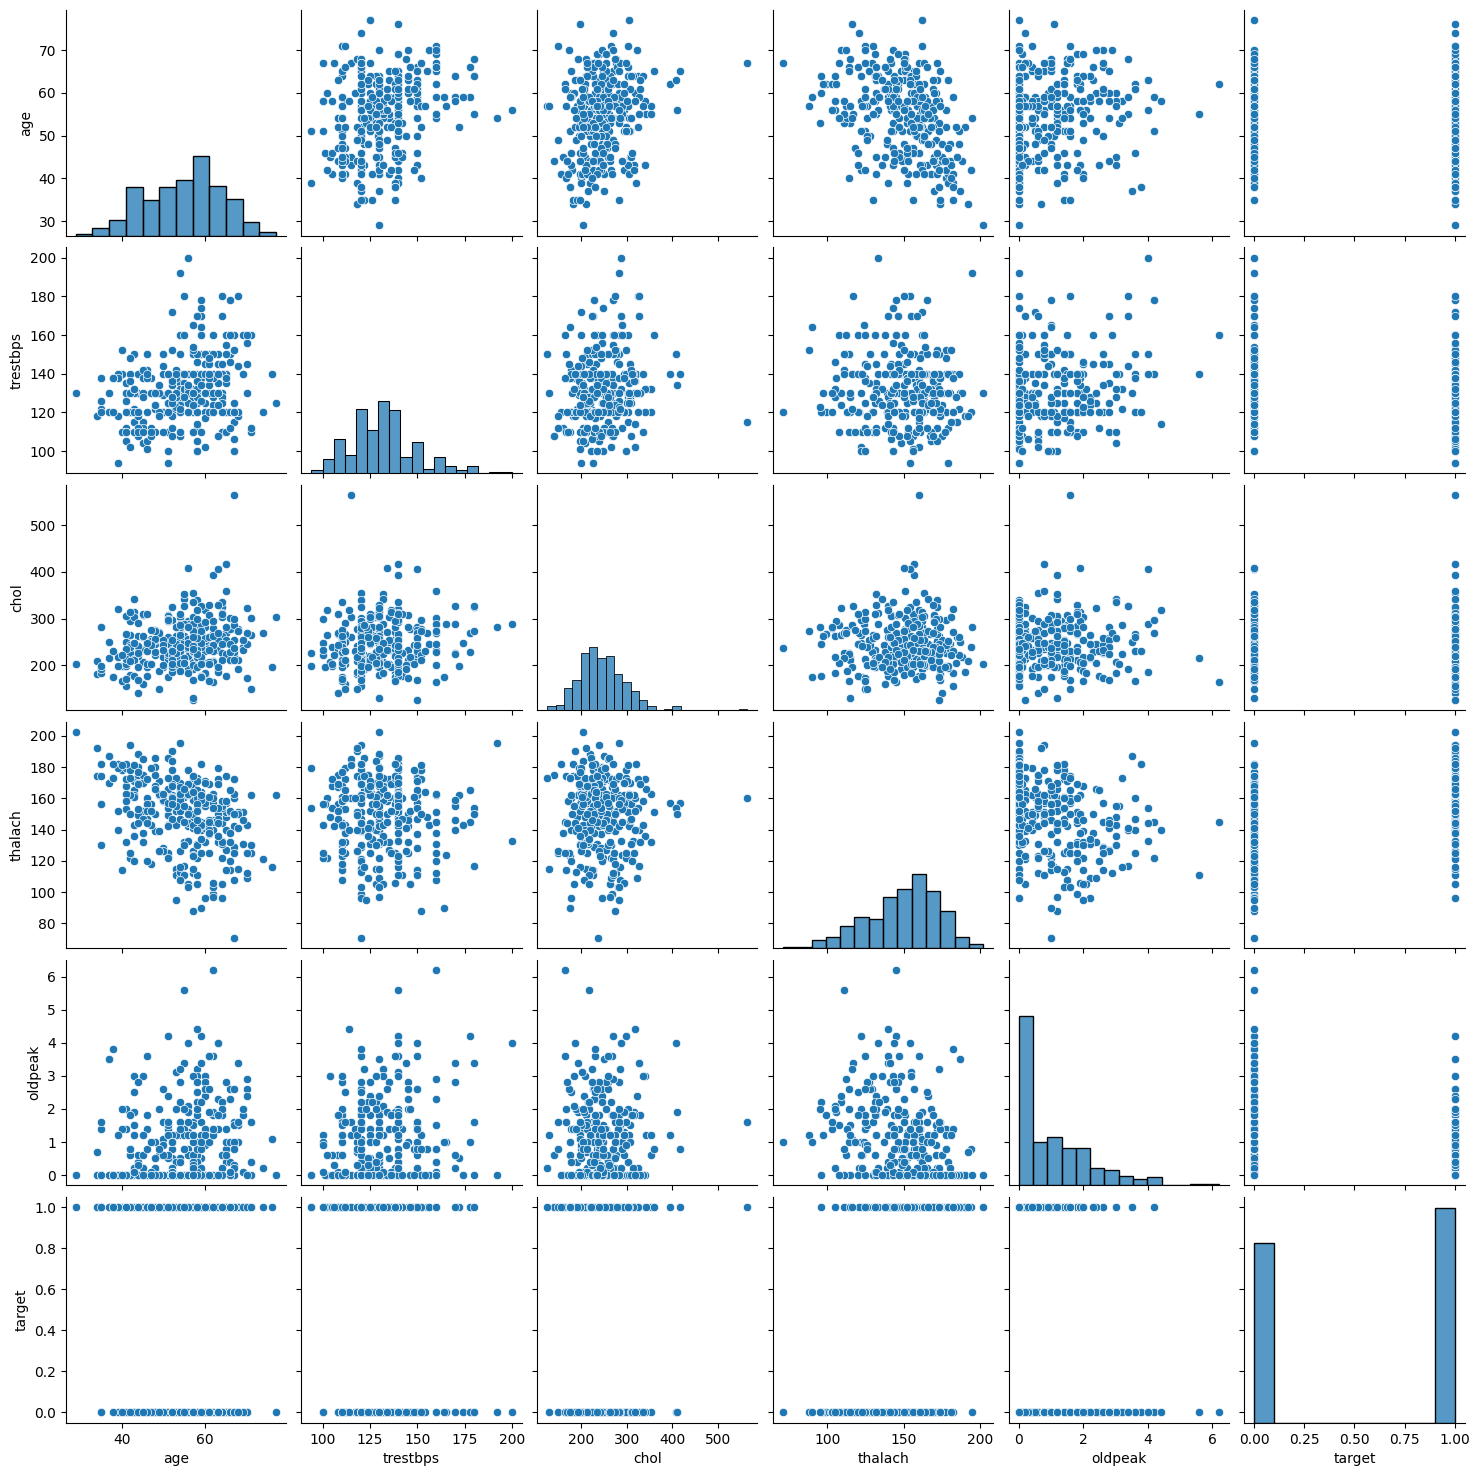

In [68]:
num_var=['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target' ]
sns.pairplot(heart[num_var],kind='scatter',diag_kind='hist')
plt.show()

In [70]:
heart['age'].nunique()

41

In [71]:
heart['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

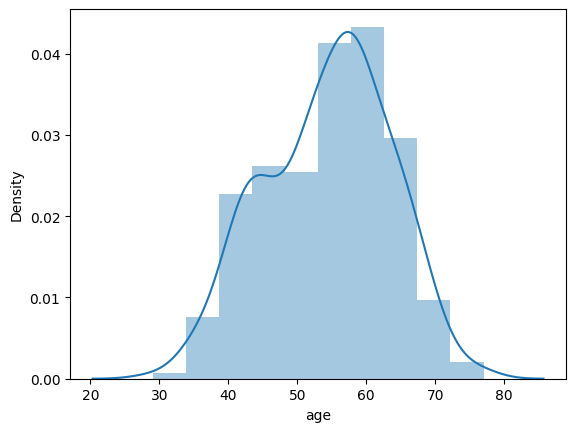

In [72]:
sns.distplot(heart['age'],bins=10)
plt.show()

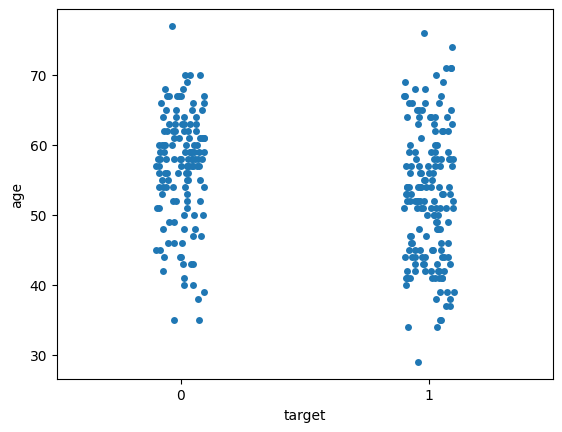

In [74]:
sns.stripplot(x='target',y='age',data=heart)
plt.show()

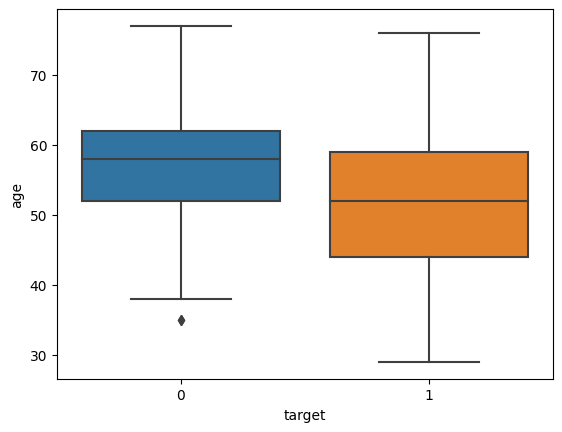

In [75]:
sns.boxplot(x='target',y='age',data=heart)
plt.show()

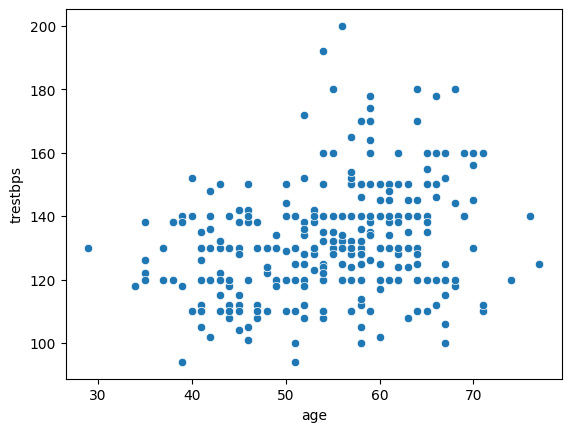

In [77]:
sns.scatterplot(y='trestbps',x='age',data=heart)
plt.show()

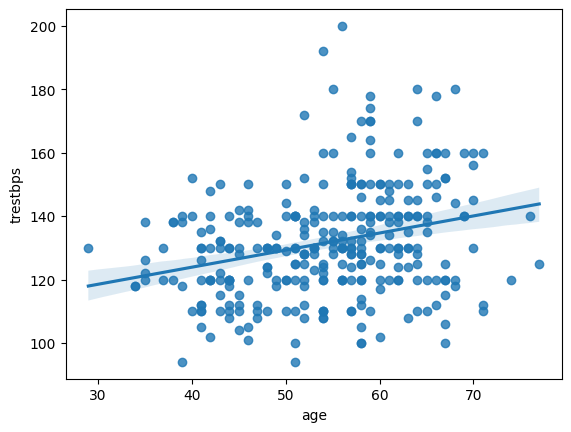

In [78]:
sns.regplot(y='trestbps',x='age',data=heart)
plt.show()

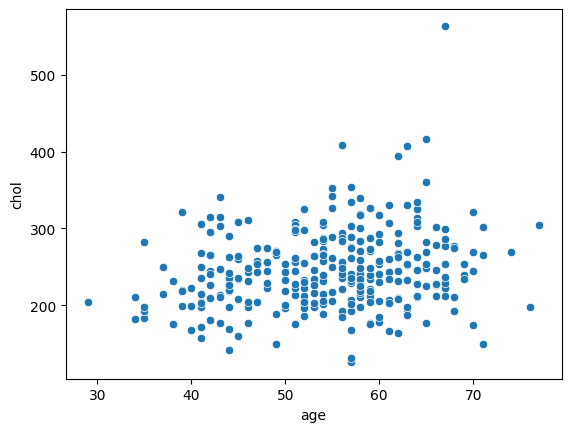

In [79]:
sns.scatterplot(y='chol',x='age',data=heart)
plt.show()

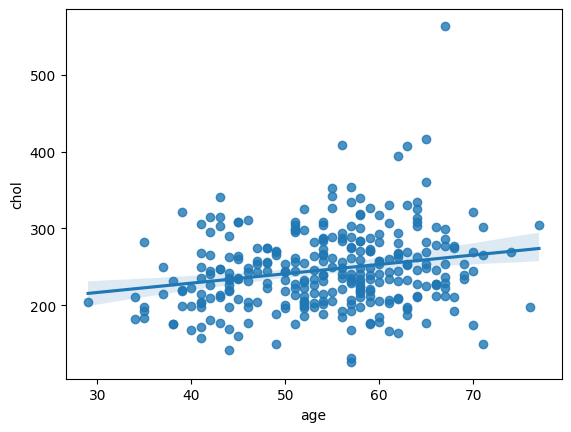

In [80]:
sns.regplot(y='chol',x='age',data=heart)
plt.show()

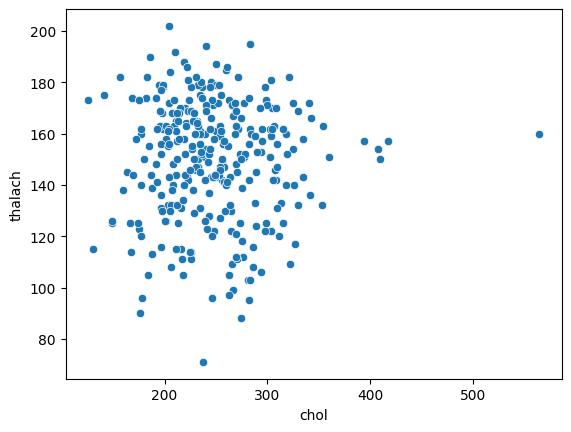

In [81]:
sns.scatterplot(x='chol',y='thalach',data=heart)
plt.show()

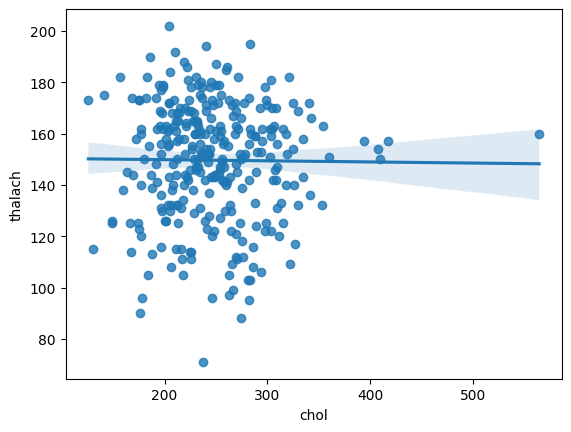

In [82]:
sns.regplot(x='chol',y='thalach',data=heart)
plt.show()

In [83]:
assert pd.notnull(heart).all().all()

In [84]:
assert(heart>=0).all().all()

In [86]:
heart['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

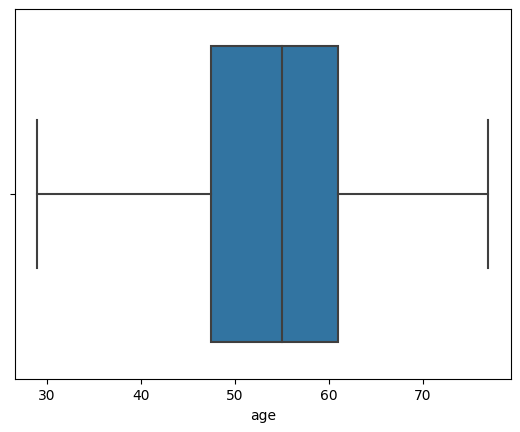

In [87]:
sns.boxplot(x=heart['age'])
plt.show()

In [89]:
heart['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

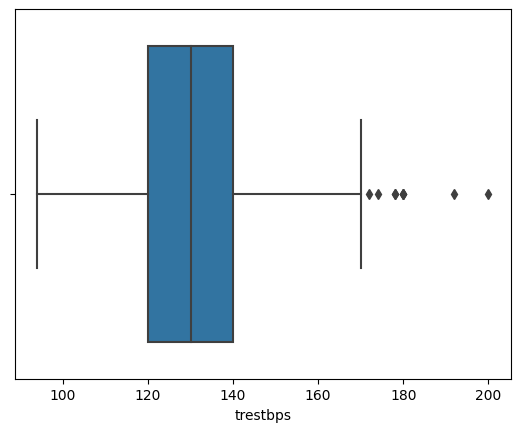

In [90]:
sns.boxplot(x=heart['trestbps'])
plt.show()

In [91]:
heart['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

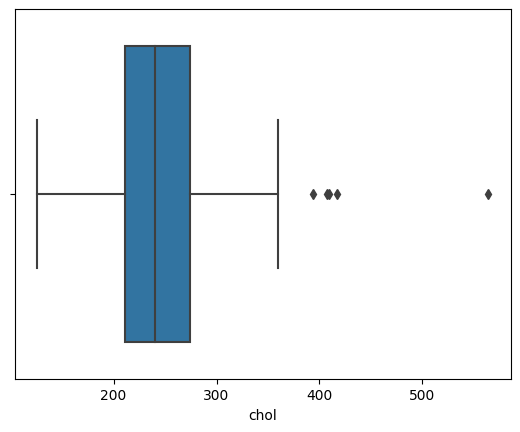

In [102]:
sns.boxplot(x=heart['chol'])
plt.show()

In [94]:
heart['thalach'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

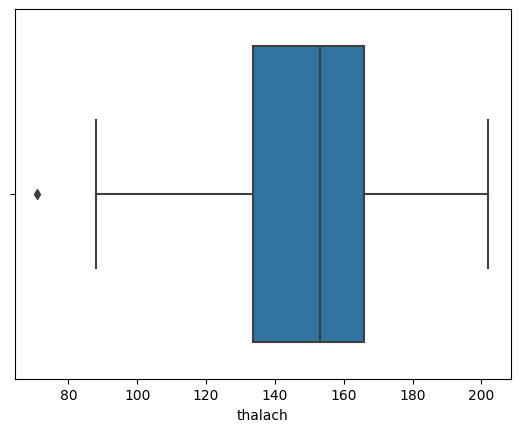

In [101]:
sns.boxplot(x=heart['thalach'])
plt.show()

In [96]:
heart['oldpeak'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

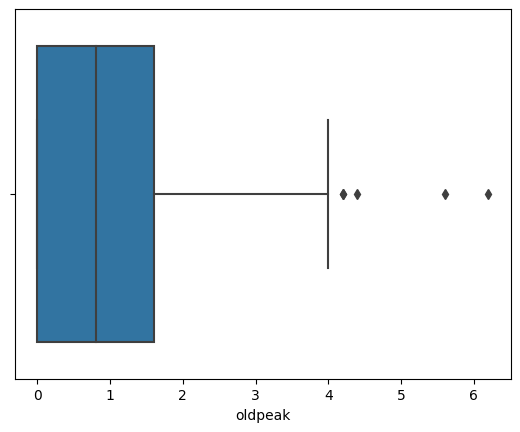

In [100]:
sns.boxplot(x=heart['oldpeak'])
plt.show()